# Project: Wrangling and Analyze Data

In [2]:
import pandas as pd
import numpy as np
import os
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
#import WeRateDogs Twitter Archive csv
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#import WeRateDogs Predictions tsv from url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open((url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [4]:
predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# Access Tokens, API/Consumer Key
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

# provide the consumer key and secret with the access token and access
# token secret to authenticate
client = tweepy.Client(consumer_key=consumer_key, consumer_secret=consumer_secret,
                       access_token=access_token, access_token_secret=access_token_secret,
                       return_type = requests.Response, wait_on_rate_limit=True)

In [7]:
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = client.get_tweets(tweet_id, user_auth=True,
                                     tweet_fields=['id', 'public_metrics']).json()
            print("Success")
            json.dump(tweet['data'], outfile)
            outfile.write('\n')
        except Exception as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Success
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 88605416

Success
260: 843235543001513987
Success
261: 842892208864923648
Success
Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
Fail
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 83820150365140172

Success
516: 811386762094317568
Success
517: 810984652412424192
Success
518: 810896069567610880
Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success


Rate limit exceeded. Sleeping for 673 seconds.


Success
713: 784431430411685888
Success
714: 784183165795655680
Success
715: 784057939640352768
Success
716: 783839966405230592
Success
717: 783821107061198850
Success
718: 783695101801398276
Success
719: 783466772167098368
Success
720: 783391753726550016
Success
721: 783347506784731136
Success
722: 783334639985389568
Success
723: 783085703974514689
Success
724: 782969140009107456
Success
725: 782747134529531904
Success
726: 782722598790725632
Success
727: 782598640137187329
Success
728: 782305867769217024
Success
729: 782021823840026624
Success
730: 781955203444699136
Success
731: 781661882474196992
Success
732: 781655249211752448
Success
733: 781524693396357120
Success
734: 781308096455073793
Success
735: 781251288990355457
Success
736: 781163403222056960
Success
737: 780931614150983680
Success
738: 780858289093574656
Success
739: 780800785462489090
Success
740: 780601303617732608
Success
741: 780543529827336192
Success
742: 780496263422808064
Success
743: 780476555013349377
Success


Success
968: 750381685133418496
Success
969: 750147208377409536
Success
970: 750132105863102464
Success
971: 750117059602808832
Success
972: 750101899009982464
Success
973: 750086836815486976
Success
974: 750071704093859840
Success
975: 750056684286914561
Success
976: 750041628174217216
Success
977: 750026558547456000
Success
978: 750011400160841729
Success
979: 749996283729883136
Success
980: 749981277374128128
Success
981: 749774190421639168
Success
982: 749417653287129088
Success
983: 749403093750648834
Success
984: 749395845976588288
Success
985: 749317047558017024
Success
986: 749075273010798592
Success
987: 749064354620928000
Success
988: 749036806121881602
Success
989: 748977405889503236
Success
990: 748932637671223296
Success
991: 748705597323898880
Success
992: 748699167502000129
Success
993: 748692773788876800
Success
994: 748575535303884801
Success
995: 748568946752774144
Success
996: 748346686624440324
Success
997: 748337862848962560
Success
998: 748324050481647620
Success


Success
1218: 714962719905021952
Success
1219: 714957620017307648
Success
1220: 714631576617938945
Success
1221: 714606013974974464
Success
1222: 714485234495041536
Success
1223: 714258258790387713
Success
1224: 714251586676113411
Success
1225: 714214115368108032
Success
1226: 714141408463036416
Success
1227: 713919462244790272
Success
1228: 713909862279876608
Success
1229: 713900603437621249
Success
1230: 713761197720473600
Success
1231: 713411074226274305
Success
1232: 713177543487135744
Success
1233: 713175907180089344
Success
1234: 712809025985978368
Success
1235: 712717840512598017
Success
1236: 712668654853337088
Success
1237: 712438159032893441
Success
1238: 712309440758808576
Success
1239: 712097430750289920
Success
1240: 712092745624633345
Success
1241: 712085617388212225
Success
1242: 712065007010385924
Success
1243: 711998809858043904
Success
1244: 711968124745228288
Success
1245: 711743778164514816
Success
1246: 711732680602345472
Success
1247: 711694788429553666
Success
12

Success
1468: 694329668942569472
Success
1469: 694206574471057408
Success
1470: 694183373896572928
Success
1471: 694001791655137281
Success
1472: 693993230313091072
Success
1473: 693942351086120961
Success
1474: 693647888581312512
Success
1475: 693644216740769793
Success
1476: 693642232151285760
Success
1477: 693629975228977152
Success
1478: 693622659251335168
Success
1479: 693590843962331137
Success
1480: 693582294167244802
Success
1481: 693486665285931008
Success
1482: 693280720173801472
Success
1483: 693267061318012928
Success
1484: 693262851218264065
Success
1485: 693231807727280129
Success
1486: 693155686491000832
Success
1487: 693109034023534592
Success
1488: 693095443459342336
Success
1489: 692919143163629568
Success
1490: 692905862751522816
Success
1491: 692901601640583168
Success
1492: 692894228850999298
Success
1493: 692828166163931137
Success
1494: 692752401762250755
Success
1495: 692568918515392513
Success
1496: 692535307825213440
Success
1497: 692530551048294401
Success
14

Success
1717: 680206703334408192
Success
1718: 680191257256136705
Success
1719: 680176173301628928
Success
1720: 680161097740095489
Success
1721: 680145970311643136
Success
1722: 680130881361686529
Success
1723: 680115823365742593
Success
1724: 680100725817409536
Success
1725: 680085611152338944
Success
1726: 680070545539371008
Success
1727: 680055455951884288
Success
Fail
1728: 679877062409191424
Success
1729: 679872969355714560
Success
1730: 679862121895714818
Success
1731: 679854723806179328
Success
1732: 679844490799091713
Success
1733: 679828447187857408
Success
1734: 679777920601223168
Success
1735: 679736210798047232
Success
1736: 679729593985699840
Success
1737: 679722016581222400
Success
1738: 679530280114372609
Success
1739: 679527802031484928
Success
1740: 679511351870550016
Success
1741: 679503373272485890
Success
1742: 679475951516934144
Success
1743: 679462823135686656
Success
1744: 679405845277462528
Success
1745: 679158373988876288
Success
1746: 679148763231985668
Succe

Rate limit exceeded. Sleeping for 763 seconds.


Success
1936: 674008982932058114
Success
1937: 673956914389192708
Success
1938: 673919437611909120
Success
1939: 673906403526995968
Success
1940: 673887867907739649
Success
1941: 673716320723169284
Success
1942: 673715861853720576
Success
1943: 673711475735838725
Success
1944: 673709992831262724
Success
1945: 673708611235921920
Success
1946: 673707060090052608
Success
1947: 673705679337693185
Success
1948: 673700254269775872
Success
1949: 673697980713705472
Success
1950: 673689733134946305
Success
1951: 673688752737402881
Success
1952: 673686845050527744
Success
1953: 673680198160809984
Success
1954: 673662677122719744
Success
1955: 673656262056419329
Success
1956: 673636718965334016
Success
1957: 673612854080196609
Success
1958: 673583129559498752
Success
1959: 673580926094458881
Success
1960: 673576835670777856
Success
1961: 673363615379013632
Success
1962: 673359818736984064
Success
1963: 673355879178194945
Success
1964: 673352124999274496
Success
1965: 673350198937153538
Success
19

Success
2186: 668986018524233728
Success
2187: 668981893510119424
Success
2188: 668979806671884288
Success
2189: 668975677807423489
Success
2190: 668967877119254528
Success
2191: 668960084974809088
Success
2192: 668955713004314625
Success
2193: 668932921458302977
Success
2194: 668902994700836864
Success
2195: 668892474547511297
Success
2196: 668872652652679168
Success
2197: 668852170888998912
Success
2198: 668826086256599040
Success
2199: 668815180734689280
Success
2200: 668779399630725120
Success
2201: 668655139528511488
Success
2202: 668645506898350081
Success
2203: 668643542311546881
Success
2204: 668641109086707712
Success
2205: 668636665813057536
Success
2206: 668633411083464705
Success
2207: 668631377374486528
Success
2208: 668627278264475648
Success
2209: 668625577880875008
Success
2210: 668623201287675904
Success
2211: 668620235289837568
Success
2212: 668614819948453888
Success
2213: 668587383441514497
Success
2214: 668567822092664832
Success
2215: 668544745690562560
Success
22

In [7]:
# the json objects are hidden as strings and also inside an array object
# we need to convert each line from a string to json / dictionary object array object 
# select the first element of the array and append it to the new list of dictionaries
# then convert the new list of dictionaries to a dataframe
all_data = []
with open('tweet_json.txt', 'r') as file:
     for line in file:
        json_data = json.loads(line)[0]
        all_data.append(json_data)
tweets_df = pd.json_normalize(all_data)
tweets_df.head()

,edit_history_tweet_ids,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count
0,[892420643555336193],This is Phineas. He's a mystical boy. Only eve...,892420643555336193,6935,137,33107,219
1,[892177421306343426],This is Tilly. She's just checking pup on you....,892177421306343426,5236,170,28623,274
2,[891815181378084864],This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,3448,110,21523,145
3,[891689557279858688],This is Darla. She commenced a snooze mid meal...,891689557279858688,7146,141,36093,286
4,[891327558926688256],This is Franklin. He would like you to stop ca...,891327558926688256,7674,193,34537,296


## Assessing Data

### Assessing predictions_df:

In [5]:
predictions_df.info()
predictions_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [6]:
predictions_df.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1476,780496263422808064,https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg,1,pug,0.99731,True,Brabancon_griffon,0.001186,True,French_bulldog,0.000428,True


In [7]:
predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [8]:
predictions_df.p1_conf.sort_values(), predictions_df.p2_conf.sort_values(), predictions_df.p3_conf.sort_values()

(38      0.044333
 136     0.055379
 1093    0.059033
 1370    0.063152
 246     0.070076
           ...   
 1372    0.999953
 149     0.999956
 1229    0.999962
 1299    0.999984
 106     1.000000
 Name: p1_conf, Length: 2075, dtype: float64,
 106     1.011300e-08
 1299    1.002880e-05
 1229    1.448950e-05
 230     1.763430e-05
 1372    2.335910e-05
             ...     
 72      4.549370e-01
 232     4.605650e-01
 1514    4.648160e-01
 1756    4.676780e-01
 986     4.880140e-01
 Name: p2_conf, Length: 2075, dtype: float64,
 106     1.740170e-10
 149     2.160900e-07
 1906    5.595040e-07
 1760    8.832830e-07
 1299    1.434470e-06
             ...     
 1613    2.476190e-01
 123     2.551820e-01
 97      2.706730e-01
 1080    2.710420e-01
 1071    2.734190e-01
 Name: p3_conf, Length: 2075, dtype: float64)

In [9]:
predictions_df.p1.value_counts(), predictions_df.p2.value_counts(), predictions_df.p3.value_counts()

(golden_retriever      150
 Labrador_retriever    100
 Pembroke               89
 Chihuahua              83
 pug                    57
                      ... 
 pillow                  1
 carousel                1
 bald_eagle              1
 lorikeet                1
 orange                  1
 Name: p1, Length: 378, dtype: int64,
 Labrador_retriever    104
 golden_retriever       92
 Cardigan               73
 Chihuahua              44
 Pomeranian             42
                      ... 
 medicine_chest          1
 quail                   1
 horse_cart              1
 waffle_iron             1
 bagel                   1
 Name: p2, Length: 405, dtype: int64,
 Labrador_retriever    79
 Chihuahua             58
 golden_retriever      48
 Eskimo_dog            38
 kelpie                35
                       ..
 ox                     1
 assault_rifle          1
 axolotl                1
 pot                    1
 banana                 1
 Name: p3, Length: 408, dtype: int64)

In [10]:
sum(predictions_df['jpg_url'].duplicated()), sum(predictions_df['tweet_id'].duplicated())

(66, 0)

In [11]:
predictions_df[predictions_df['jpg_url'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


### Assessing twitter_archive_df:

In [12]:
twitter_archive_df.info()
twitter_archive_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [13]:
twitter_archive_df.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1858,675501075957489664,NaN,NaN,2015-12-12 02:23:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I shall call him squishy and he shall be mine,...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/675501075...,13,10,None,None,None,None,None


In [14]:
sum(twitter_archive_df['tweet_id'].duplicated()), sum(twitter_archive_df['text'].duplicated())

(0, 0)

In [15]:
twitter_archive_df[twitter_archive_df['in_reply_to_status_id'].notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [16]:
twitter_archive_df[twitter_archive_df['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [17]:
twitter_archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [18]:
twitter_archive_df[['rating_numerator', 'rating_denominator']].value_counts()

rating_numerator  rating_denominator
12                10                    558
11                10                    463
10                10                    461
13                10                    351
9                 10                    156
8                 10                    102
7                 10                     54
14                10                     54
5                 10                     37
6                 10                     32
3                 10                     19
4                 10                     15
2                 10                      9
1                 10                      8
420               10                      2
15                10                      2
0                 10                      2
9                 11                      2
4                 20                      2
75                10                      2
666               10                      1
84                70                   

In [508]:
twitter_archive_df.query('rating_denominator > 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [325]:
#query text column and retweeted_status_id to confirm rows are retweets
tmp = twitter_archive_df[['retweeted_status_id', 'text']]
tmp.query('retweeted_status_id.notnull()')

,retweeted_status_id,text
19,8.874740e+17,RT @dog_rates: This is Canela. She attempted s...
32,8.860537e+17,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...
36,8.305833e+17,RT @dog_rates: This is Lilly. She just paralle...
68,8.780576e+17,RT @dog_rates: This is Emmy. She was adopted t...
73,8.782815e+17,RT @dog_rates: Meet Shadow. In an attempt to r...
...,...,...
1023,6.678667e+17,RT @dog_rates: This is Shaggy. He knows exactl...
1043,6.671383e+17,RT @dog_rates: Extremely intelligent dog here....
1242,7.119983e+17,RT @twitter: @dog_rates Awesome Tweet! 12/10. ...
2259,6.675487e+17,RT @dogratingrating: Exceptional talent. Origi...


### Assessing tweets_df:

In [48]:
tweets_df.info()
tweets_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   edit_history_tweet_ids        2325 non-null   object
 1   text                          2325 non-null   object
 2   id                            2325 non-null   object
 3   public_metrics.retweet_count  2325 non-null   int64 
 4   public_metrics.reply_count    2325 non-null   int64 
 5   public_metrics.like_count     2325 non-null   int64 
 6   public_metrics.quote_count    2325 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 127.3+ KB


,edit_history_tweet_ids,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count
0,[892420643555336193],This is Phineas. He's a mystical boy. Only eve...,892420643555336193,6935,137,33107,219
1,[892177421306343426],This is Tilly. She's just checking pup on you....,892177421306343426,5236,170,28623,274
2,[891815181378084864],This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,3448,110,21523,145
3,[891689557279858688],This is Darla. She commenced a snooze mid meal...,891689557279858688,7146,141,36093,286
4,[891327558926688256],This is Franklin. He would like you to stop ca...,891327558926688256,7674,193,34537,296
...,...,...,...,...,...,...,...
2320,[666049248165822465],Here we have a 1949 1st generation vulpix. Enj...,666049248165822465,36,9,87,0
2321,[666044226329800704],This is a purebred Piers Morgan. Loves to Netf...,666044226329800704,114,1,245,2
2322,[666033412701032449],Here is a very happy pup. Big fan of well-main...,666033412701032449,36,1,98,0
2323,[666029285002620928],This is a western brown Mitsubishi terrier. Up...,666029285002620928,39,0,111,0


In [222]:
sum(tweets_df['id'].duplicated()), sum(tweets_df['text'].duplicated())

(0, 0)

In [22]:
tweets_df.sample(5)

,edit_history_tweet_ids,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count
559,[800443802682937345],RT @dog_rates: This is Sampson. He's about to ...,800443802682937345,3994,0,0,0
2231,[667546741521195010],Here is George. George took a selfie of his ne...,667546741521195010,105,6,302,0
756,[775842724423557120],This is Blue. He was having an average day unt...,775842724423557120,2439,92,10790,136
1733,[678424312106393600],This is Crystal. She's a shitty fireman. No se...,678424312106393600,2250,76,4908,13
1438,[694206574471057408],"""Martha come take a look at this. I'm so fed u...",694206574471057408,1839,18,3755,0


In [23]:
tweets_df.describe()

,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count
count,2325.000000,2325.000000,2325.000000,2325.000000
mean,2446.600000,41.985806,6912.302796,71.393548
std,4139.441688,70.418238,10736.094778,220.348698
min,0.000000,0.000000,0.000000,0.000000
25%,492.000000,9.000000,1201.000000,0.000000
50%,1139.000000,23.000000,2992.000000,1.000000
75%,2833.000000,48.000000,8445.000000,70.000000
max,69861.000000,1115.000000,142432.000000,4347.000000


### Quality issues
#### **`twitter_archive`**
- has the value 'None' in these columns (name, doggo, floofer, pupper, puppo) rather then null

- has odd values such as "a" in the 'name' column 

- timestamps are strings rather then datetime variebles

- has null values in several columns (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `expanded_urls`) & retweet columns are not needed.

- Not all Denominator ratings are 10 or higher and may be due to text scraping issues

- There are 181 rows of retweets based on retweet_status_id and text columns

#### **`tweets_df`**
- missing data (2325 rows vs 2356 in 'twitter_archive' table)

- has a minimum value of 0 in each count column

- id column is a string datatype while the other tables are int datatypes.

- some records are retweets based on text with 'RT'


#### **`predictions_df`**
- has inconsistant values in columns (p1, p2, p3)
- has only 2075 rows


### Tidiness issues
- Issues with column names for `tweets_df`

- unnecessary data from `tweets_df`, *edit_history_tweet_ids*

- In the `twitter_archive` table there are four columns (doggo, floofer, pupper, puppo) representing a single variable dog stage

- All three datasets have similar observations that could be merged into one table with duplicate columns removed 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

In [1059]:
# Make copies of original pieces of data
predictions_df_clean = predictions_df.copy()
twitter_archive_df_clean = twitter_archive_df.copy()
tweets_df_clean = tweets_df.copy()

### Issue #1: Column Names & Extra Columns

#### Define
Change unclear column names from `tweets_df_clean` by removing the 'public_metrics' and change *id* to match other tables with *tweet_id*.

#### Code

In [1060]:
#rename columns from tweets_df_clean to fix inconsistencies between tables for easier cleaning and drop unnecessary columns
tweets_df_clean = tweets_df_clean.rename(columns={'id': 'tweet_id',
                                    'public_metrics.retweet_count': 'retweet_count',
                                    'public_metrics.reply_count': 'reply_count',
                                   'public_metrics.like_count': 'favorite_count',
                                   'public_metrics.quote_count': 'quote_count'})

#### Test

In [1061]:
tweets_df_clean.head()

,edit_history_tweet_ids,text,tweet_id,retweet_count,reply_count,favorite_count,quote_count
0,[892420643555336193],This is Phineas. He's a mystical boy. Only eve...,892420643555336193,6935,137,33107,219
1,[892177421306343426],This is Tilly. She's just checking pup on you....,892177421306343426,5236,170,28623,274
2,[891815181378084864],This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,3448,110,21523,145
3,[891689557279858688],This is Darla. She commenced a snooze mid meal...,891689557279858688,7146,141,36093,286
4,[891327558926688256],This is Franklin. He would like you to stop ca...,891327558926688256,7674,193,34537,296


In [1062]:
tweets_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   edit_history_tweet_ids  2325 non-null   object
 1   text                    2325 non-null   object
 2   tweet_id                2325 non-null   object
 3   retweet_count           2325 non-null   int64 
 4   reply_count             2325 non-null   int64 
 5   favorite_count          2325 non-null   int64 
 6   quote_count             2325 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 127.3+ KB


### Issue #2: `twitter_archive_clean` 'None' values & multiple columns for dog type

#### Define
Change 'None' values to NaN  from the `twitter_archive_clean` table then combine the columns (doggo, floofer, pupper, puppo) into a single column `dog_stage` and drop the old columns.

#### Code

In [1063]:
twitter_archive_df_clean.replace(to_replace={
             'name':{'None':np.nan}, 
             'doggo':{'None':np.nan},
             'pupper':{'None':np.nan},
             'floofer':{'None':np.nan},
             'puppo':{'None':np.nan}
                 }, inplace=True)

twitter_archive_df_clean['dog_stage'] = twitter_archive_df_clean[['doggo', 'pupper', 'floofer','puppo']].apply(lambda x: ','.join(x.dropna()), axis=1)

twitter_archive_df_clean = twitter_archive_df_clean.drop(['doggo','pupper','floofer','puppo'], axis=1)

#### Test

In [1064]:
twitter_archive_df_clean.dog_stage.value_counts()

                 1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [1065]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  dog_stage                   2356 

### Issue #3: Remove Retweets

#### Define
Drop the 181 rows of retweets based on retweet_status_id.

#### Code

In [1066]:
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean['retweeted_status_id'].isna()]

#### Test

In [1067]:
twitter_archive_df_clean[twitter_archive_df_clean['retweeted_status_id'].notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


### Issue #4: Mismatching Datatypes

#### Define
- Change `twitter_archive_df_clean` timestamps that is a string into a datetime datatype.
- Change `tweets_df_clean` tweet_id column from a string datatype to an int datatype

#### Code

In [1068]:
twitter_archive_df_clean['timestamp'] = pd.to_datetime(twitter_archive_df_clean['timestamp'], infer_datetime_format=True)
tweets_df_clean['tweet_id'] = tweets_df_clean['tweet_id'].astype(np.int64)

#### Test

In [1069]:
twitter_archive_df_clean.info()
predictions_df_clean.info()
tweets_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

### Issue #5: Merge Tables

#### Define: 
Merge datasats into one table with all duplicat and unnecessary columns removed as well as unmatched retweet rows.

#### Code

In [1070]:
# Merge all three dataset with only matching ID's 
all_tweet_data =pd.merge(pd.merge(predictions_df_clean, tweets_df_clean,
                          on=['tweet_id'], how='inner'),twitter_archive_df_clean, on=['tweet_id', 'text'], how='inner')

In [1071]:
# drop all unnecessary columns
all_tweet_data.drop(['in_reply_to_status_id', 
                     'in_reply_to_user_id',
                     'retweeted_status_id',
                     'retweeted_status_user_id',
                     'retweeted_status_timestamp',
                     'edit_history_tweet_ids'], axis=1, inplace=True)

#### Test

In [1072]:
all_tweet_data.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,reply_count,favorite_count,quote_count,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1542,796116448414461957,https://pbs.twimg.com/media/CwxfrguUUAA1cbl.jpg,1,Cardigan,0.700182,True,Pembroke,0.260738,True,papillon,...,48,8461,52,2016-11-08 22:25:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/796116448...,11,10,NaN,
1303,753655901052166144,https://pbs.twimg.com/media/CnWGCpdWgAAWZTI.jpg,1,miniature_pinscher,0.456092,True,toy_terrier,0.153126,True,Italian_greyhound,...,45,5366,104,2016-07-14 18:22:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/753655901...,10,10,NaN,
528,676819651066732545,https://pbs.twimg.com/media/CWSL4W8WsAAE4KU.jpg,2,rain_barrel,0.625555,False,barrel,0.138383,False,Labrador_retriever,...,6,1631,1,2015-12-15 17:42:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/676819651...,12,10,NaN,pupper
880,698907974262222848,https://pbs.twimg.com/media/CbMFFssWIAAyuOd.jpg,3,German_short-haired_pointer,0.983131,True,bluetick,0.005558,True,curly-coated_retriever,...,13,2302,0,2016-02-14 16:33:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/698907974...,10,10,NaN,
1133,728986383096946689,https://pbs.twimg.com/media/Ch3hOGWUYAE7w0y.jpg,2,Maltese_dog,0.952070,True,toy_poodle,0.027271,True,miniature_poodle,...,13,2837,1,2016-05-07 16:34:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/728986383...,11,10,Puff,
1773,839549326359670784,https://pbs.twimg.com/media/C6atpTLWYAIL7bU.jpg,1,swing,0.393527,False,Norwich_terrier,0.052480,True,Pembroke,...,92,25098,180,2017-03-08 18:52:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/839549326...,12,10,Winston,
289,671182547775299584,https://pbs.twimg.com/media/CVCE9uYXIAEtSzR.jpg,1,Rottweiler,0.331179,True,kelpie,0.218601,True,Appenzeller,...,5,960,0,2015-11-30 04:22:44+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/671182547...,12,10,NaN,
1383,768473857036525572,https://pbs.twimg.com/media/Cqoq5PGWAAA-U8T.jpg,1,Labrador_retriever,0.739170,True,Chesapeake_Bay_retriever,0.246488,True,kelpie,...,76,12553,232,2016-08-24 15:43:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/768473857...,11,10,Chevy,
1061,715680795826982913,https://pbs.twimg.com/media/Ce6b4MPWwAA22Xm.jpg,1,golden_retriever,0.990715,True,Labrador_retriever,0.002228,True,chow,...,29,3903,1,2016-03-31 23:22:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/715680795...,12,10,Zeus,
49,666835007768551424,https://pbs.twimg.com/media/CUES51dXIAEahyG.jpg,1,Airedale,0.448459,True,toy_poodle,0.124030,True,teddy,...,1,181,1,2015-11-18 04:27:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666835007...,10,10,NaN,


In [1073]:
all_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1986 non-null   int64              
 1   jpg_url             1986 non-null   object             
 2   img_num             1986 non-null   int64              
 3   p1                  1986 non-null   object             
 4   p1_conf             1986 non-null   float64            
 5   p1_dog              1986 non-null   bool               
 6   p2                  1986 non-null   object             
 7   p2_conf             1986 non-null   float64            
 8   p2_dog              1986 non-null   bool               
 9   p3                  1986 non-null   object             
 10  p3_conf             1986 non-null   float64            
 11  p3_dog              1986 non-null   bool               
 12  text                1986 non-null 

### Issue #6: Not all Denominator ratings are 10

#### Define
Fix issues with ratings where denominator does not equal 10 by replacing numerators with ((numerator/denominator) x 10) to find an equivilant replacement then replace all denominators with 10

#### Re-Assess

In [1074]:
print(all_tweet_data[['text','rating_numerator', 'rating_denominator']].query('rating_denominator != 10').values)

[['This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'
  1 2]
 ['Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw'
  88 80]
 ["IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq"
  144 120]
 ['This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5'
  7 11]
 ['Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55'
  121 110]
 ['Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3'
  143 130]
 ["Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ"
  44 40]
 ["Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa"
  

> After looking at the text records it seems many of the denominator errors are caused by the wrong numbers being gathered.

#### Code

In [1075]:
#first going to change rating columns to rounded up ints for easier fix
all_tweet_data[['rating_denominator', 'rating_numerator']].astype(int)
all_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1986 non-null   int64              
 1   jpg_url             1986 non-null   object             
 2   img_num             1986 non-null   int64              
 3   p1                  1986 non-null   object             
 4   p1_conf             1986 non-null   float64            
 5   p1_dog              1986 non-null   bool               
 6   p2                  1986 non-null   object             
 7   p2_conf             1986 non-null   float64            
 8   p2_dog              1986 non-null   bool               
 9   p3                  1986 non-null   object             
 10  p3_conf             1986 non-null   float64            
 11  p3_dog              1986 non-null   bool               
 12  text                1986 non-null 

In [1076]:
#find all ratings where denominator is not 10 and replace with last set of numbers before link to ensure correct values are used.
import re

for ind in all_tweet_data.index:
    if all_tweet_data['rating_denominator'][ind] != 10:
        string = all_tweet_data['text'][ind].split('://')[0]
        x = re.findall('[0-9]+', string)
        numerator = x[-2]
        denominator = x[-1]
        all_tweet_data['rating_numerator'][ind] = int(numerator)
        all_tweet_data['rating_denominator'][ind] = int(denominator)

C:\Users\palac\AppData\Local\Temp\ipykernel_38156\746757462.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_tweet_data['rating_numerator'][ind] = int(numerator)
C:\Users\palac\AppData\Local\Temp\ipykernel_38156\746757462.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_tweet_data['rating_denominator'][ind] = int(denominator)


In [1077]:
# Check text where denominator is not 10 to ensure ratings were changed correctly
print(all_tweet_data[['text','rating_numerator', 'rating_denominator']].query('rating_denominator != 10').values)

[['Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw'
  88 80]
 ["IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq"
  144 120]
 ['Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55'
  121 110]
 ['Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3'
  143 130]
 ["Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ"
  44 40]
 ["Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa"
  60 50]
 ['From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK'
  45 50]
 ["Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12"
  80 80]
 ["Happy Sa

> There is still one record that seems to be missing an actual rating and shows 24/7 as time so we will remove this one

In [1078]:
#drop value with denominator 7 to remove the 24/7 value
all_tweet_data.drop(all_tweet_data.loc[all_tweet_data['rating_denominator'] == 7].index, inplace=True)

In [1079]:
#find equivilant value for numerator and replace to adjust values where denominatore is greater then 10
all_tweet_data.loc[all_tweet_data['rating_denominator'] != 10,
                   'rating_numerator'] = ((all_tweet_data['rating_numerator'] /all_tweet_data['rating_denominator'])*10)

#replace all denominators with 10
all_tweet_data.loc[all_tweet_data['rating_denominator'] > 10 , 'rating_denominator'] = 10

In [1080]:
all_tweet_data[['rating_numerator', 'rating_denominator']].value_counts()

rating_numerator  rating_denominator
12                10                    452
10                10                    419
11                10                    403
13                10                    258
9                 10                    152
8                 10                     95
7                 10                     51
14                10                     36
5                 10                     33
6                 10                     32
3                 10                     19
4                 10                     15
2                 10                      9
1                 10                      4
0                 10                      2
26                10                      1
27                10                      1
75                10                      1
420               10                      1
1776              10                      1
dtype: int64

In [1102]:
#removing the rest of the outliers where numerator is below 2 or above 25 as these each have less then 5 ratings
all_tweet_data.drop(all_tweet_data.loc[all_tweet_data['rating_numerator'] < 2].index, inplace=True)
all_tweet_data.drop(all_tweet_data.loc[all_tweet_data['rating_numerator'] > 25].index, inplace=True)

#### Test

In [1103]:
all_tweet_data[['text','rating_numerator', 'rating_denominator']].sample(10)

,text,rating_numerator,rating_denominator
167,This is Bernie. He's taking his Halloween cost...,3,10
852,This is Trevith. He's a Swiss Mountain Roadwoo...,9,10
1389,This is Titan. He's trying to make friends. Of...,13,10
1663,This is Oliver. He has dreams of being a servi...,13,10
1535,This is Nimbus (like the cloud). He just bough...,12,10
1829,This is Rumpole. He'll be your Uber driver thi...,13,10
950,This is Terrenth. He just stubbed his toe. 10/...,10,10
853,This is Reptar. He specifically asked for his ...,10,10
1513,This is Remus. He's a mop that came to life. C...,11,10
80,This is Reese and Twips. Reese protects Twips....,7,10


In [1104]:
all_tweet_data[['rating_numerator', 'rating_denominator']].value_counts()

rating_numerator  rating_denominator
12                10                    452
10                10                    419
11                10                    403
13                10                    258
9                 10                    152
8                 10                     95
7                 10                     51
14                10                     36
5                 10                     33
6                 10                     32
3                 10                     19
4                 10                     15
2                 10                      9
dtype: int64

### Issue #7: Dog Names

In [1105]:
#quick check on names
all_tweet_data.groupby(['name'], dropna=False, as_index=False).size()

,name,size
0,Abby,2
1,Ace,1
2,Acro,1
3,Adele,1
4,Aiden,1
...,...,...
906,Zoe,1
907,Zoey,3
908,Zooey,1
909,Zuzu,1


#### Define: 
The Column `name` has some odd data likely caused by text scraping issue, replace with nulls or dogs name?

#### Code

In [1106]:
# Fix dog names by removing all bad names
####Question: Is there a way to do this function by finding all lowercase names rather then search a list
bad_dog = {'a':'',
          'the':'',
          'an':'',
          'his':'',
          'her':'',
          'such':'',
          'this':'',
          'very':'',
          'unacceptable':'',
          'officially':'',
          'one':'',
          'quite':'',
          'space':'',
          'just':'',
          'light':'',
          'my':'',
          'not':'',
          'by':'',
          'getting':'',
          'incredibly':'',
          'infuriating':'',
          'actually':'',
          'all':''}

def fix_names(dog):
    if dog['name'] in bad_dog.keys():
        n = bad_dog[dog['name']]
        return n
    else:
        return dog['name']
    
all_tweet_data['name'] = all_tweet_data.apply(fix_names, axis=1)

#### Test

In [1107]:
all_tweet_data.groupby(['name'], dropna=False, as_index=False).size()

,name,size
0,Abby,2
1,Ace,1
2,Acro,1
3,Adele,1
4,Aiden,1
...,...,...
906,Zoe,1
907,Zoey,3
908,Zooey,1
909,Zuzu,1


### Issue #8: Missing Nulls

#### Define: 
Replace blank strings with nulls in dataframe.

#### Code

In [1108]:
all_tweet_data = all_tweet_data.replace(r'^\s*$', np.nan, regex=True)

#### Test

In [1109]:
all_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1974 entries, 0 to 1985
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1974 non-null   int64              
 1   jpg_url             1974 non-null   object             
 2   img_num             1974 non-null   int64              
 3   p1                  1974 non-null   object             
 4   p1_conf             1974 non-null   float64            
 5   p1_dog              1974 non-null   bool               
 6   p2                  1974 non-null   object             
 7   p2_conf             1974 non-null   float64            
 8   p2_dog              1974 non-null   bool               
 9   p3                  1974 non-null   object             
 10  p3_conf             1974 non-null   float64            
 11  p3_dog              1974 non-null   bool               
 12  text                1974 non-null 

In [1110]:
all_tweet_data.groupby(['name'], dropna=False, as_index=False).size()

,name,size
0,Abby,2
1,Ace,1
2,Acro,1
3,Adele,1
4,Aiden,1
...,...,...
906,Zoe,1
907,Zoey,3
908,Zooey,1
909,Zuzu,1


### Issue #9  P1, P2, P3 lowercase and uppercase names and non dog breeds:

#### Define: 
Fix inconsistant dog predictions to be all lowercase and actual dogs.

#### Code

In [1111]:
all_tweet_data[['p1', 'p2','p3']] = all_tweet_data[['p1', 'p2','p3']].astype(str).apply(lambda col: col.str.lower())

In [1345]:
# Taking all data where p1_dog is true as this is the most accurate prediciton
all_tweet_data = all_tweet_data.query('p1_dog == True')

#### Test

In [1346]:
all_tweet_data[['p1', 'p2','p3']].sample(20)

,p1,p2,p3
454,chihuahua,french_bulldog,siamese_cat
724,german_shepherd,leonberg,bloodhound
959,golden_retriever,labrador_retriever,chow
1304,chow,norfolk_terrier,pomeranian
734,borzoi,whippet,saluki
1230,german_shepherd,malinois,wallaby
1613,bull_mastiff,boxer,french_bulldog
1363,malamute,jean,keeshond
1875,chesapeake_bay_retriever,labrador_retriever,weimaraner
1011,chow,tibetan_mastiff,australian_terrier


## Storing Data

In [1362]:
# save all_tweet_data dataframe to a CSV file "twitter_archive_master.csv"
all_tweet_data.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data

In [1348]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [1349]:
twitter_archive_master.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,reply_count,favorite_count,quote_count,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,...,19,2248,31,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,...,0,111,0,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,1,98,0,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,1,245,2,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,...,9,87,0,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN


### Do the Ratings Correlate with Popularity(Reply, Likes, and Quote Counts)

In [1350]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1351]:
# Add column for the calculated rating for easier comparison
twitter_archive_master['calculated_rating'] = twitter_archive_master['rating_numerator'] / twitter_archive_master['rating_denominator']

In [1352]:
twitter_archive_master[['reply_count', 'favorite_count', 'quote_count', 'rating_numerator','calculated_rating']].describe()

,reply_count,favorite_count,quote_count,rating_numerator,calculated_rating
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,44.584300,7834.777474,77.589761,10.919454,1.091945
std,73.397357,11447.696655,230.565023,1.693869,0.169387
min,0.000000,64.000000,0.000000,2.000000,0.200000
25%,13.000000,1795.000000,0.000000,10.000000,1.000000
50%,27.000000,3709.000000,2.000000,11.000000,1.100000
75%,51.000000,9733.000000,85.000000,12.000000,1.200000
max,1115.000000,142432.000000,4347.000000,14.000000,1.400000


### *Top Rated Dog Breed(Based on Most Accurate Prediction)*

In [1355]:
dog_breeds = twitter_archive_master[['p1','p1_dog','calculated_rating']].groupby(twitter_archive_master['p1']).mean()

dog_breeds.sort_values('calculated_rating')

,p1_dog,calculated_rating
p1,,
japanese_spaniel,1.0,0.500000
welsh_springer_spaniel,1.0,0.900000
walker_hound,1.0,0.900000
scotch_terrier,1.0,0.900000
norwich_terrier,1.0,0.900000
...,...,...
giant_schnauzer,1.0,1.200000
border_terrier,1.0,1.214286
tibetan_mastiff,1.0,1.225000


### Percentage of doggo fluffer... and did use of doggo vs pupper effect rating

In [1356]:
twitter_archive_master['dog_stage'].value_counts()

pupper           143
doggo             47
puppo             19
doggo,pupper       8
floofer            7
doggo,floofer      1
doggo,puppo        1
Name: dog_stage, dtype: int64

In [1297]:
twitter_archive_master[['calculated_rating', 'dog_stage']].groupby('dog_stage').mean()

,calculated_rating
dog_stage,
doggo,1.187097
"doggo,floofer",1.100000
"doggo,pupper",1.100000
"doggo,puppo",1.300000
floofer,1.200000
pupper,1.063366
puppo,1.200000


In [1322]:
twitter_archive_master.groupby('dog_stage')['calculated_rating'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,62.0,1.187097,0.147641,0.8,1.100,1.2,1.3,1.4
"doggo,floofer",1.0,1.100000,NaN,1.1,1.100,1.1,1.1,1.1
"doggo,pupper",9.0,1.100000,0.239792,0.5,1.100,1.2,1.2,1.3
"doggo,puppo",1.0,1.300000,NaN,1.3,1.300,1.3,1.3,1.3
floofer,7.0,1.200000,0.115470,1.0,1.150,1.2,1.3,1.3
pupper,202.0,1.063366,0.173189,0.3,1.000,1.1,1.2,1.4
puppo,22.0,1.200000,0.130931,0.9,1.125,1.2,1.3,1.4


### Insights:
1. **Ratings Vs Reply, Favorite, quite counts**
> Based on the statistics of the different popularity counts vs ratings it is not very clear if there is any correlation however is does appear that as rating increases so do the count values. I added a visualization for clearer comparison below. This visual comparison shows that there seems to be a correlation between popularity and dog rating where the higher the dog rating the more popular the tweet was except for the highest rated dogs actually decrease in popularity compared to the second highest rated dogs.

2. **Top Rated Dogs(Based on Prediction Types)**
> Based on the aggregated data the top-rated dog breeds are giant_schnauzer, border_terrier, tibetan_mastiff, briard, saluki. While the lowest-rated dogs are japanese_spaniel, welsh_springer_spaniel, walker_hound, scotch_terrier, norwich_terrier. Since we can't see as much data I plotted below the top 20 dog breeds as well.

3. **Comparison of doggo,pupper,puppo, floofer, and combos. How did the use of doggo vs pupper effect rating**
> Looking at the initial numbers there were a lot more pupper's and puppo's compared to the doggo category, to see this better I created a pie chart below as well as other visualizations. It also appears that the less used combo's had generally lower ratings than the single dog_stage's except the doggo/puppo combination. With the last visualization, it appears that puppo is the most liked and highest-rated dog_stage.

### Visualization

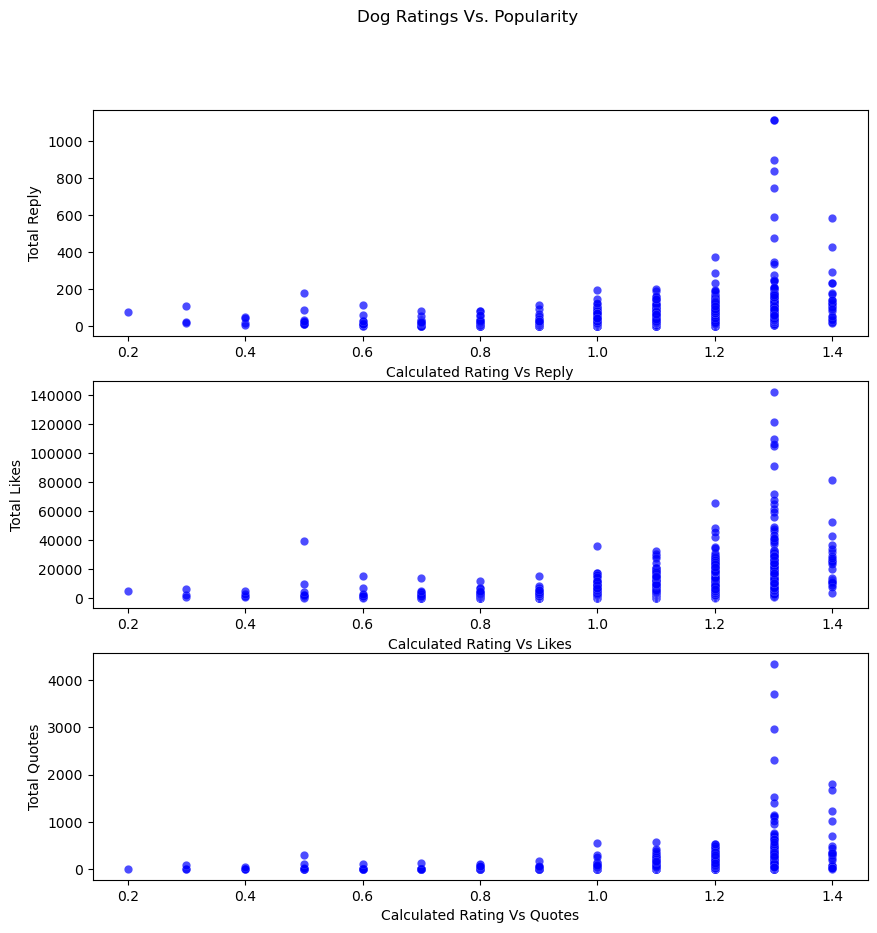

In [1357]:
# Create Scatter plots comparing each popularity count with the calculated rating
fig, ax = plt.subplots(3, figsize=(10, 10)) 
ax[0].scatter(x = twitter_archive_master['calculated_rating'], y = twitter_archive_master['reply_count'],
              color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax[0].set_xlabel('Calculated Rating Vs Reply')
ax[0].set_ylabel('Total Reply')

ax[1].scatter(x = twitter_archive_master['calculated_rating'], y = twitter_archive_master['favorite_count'],
              color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax[1].set_xlabel('Calculated Rating Vs Likes')
ax[1].set_ylabel('Total Likes')

ax[2].scatter(x = twitter_archive_master['calculated_rating'], y = twitter_archive_master['quote_count'],
              color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax[2].set_xlabel('Calculated Rating Vs Quotes')
ax[2].set_ylabel('Total Quotes')

fig.suptitle('Dog Ratings Vs. Popularity')
plt.show()

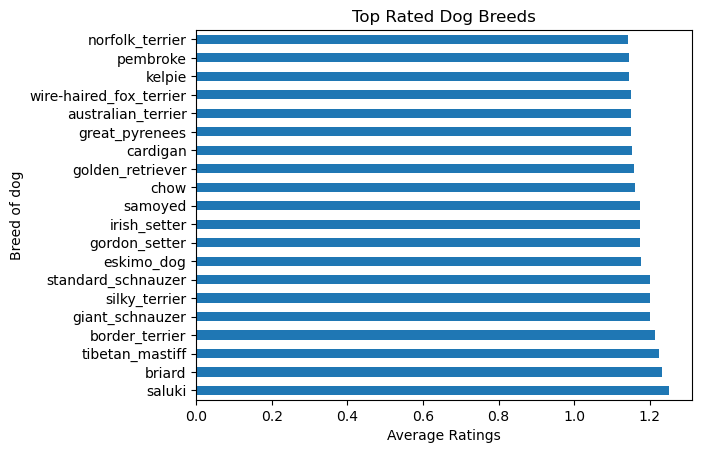

In [1358]:
# Create a bar graph to show the 20 top most rated.
dog_breeds = dog_breeds['calculated_rating'].nlargest(20,keep='all')
dog_breeds.plot(kind = 'barh')
plt.title('Top Rated Dog Breeds')
plt.xlabel('Average Ratings')
plt.ylabel('Breed of dog');

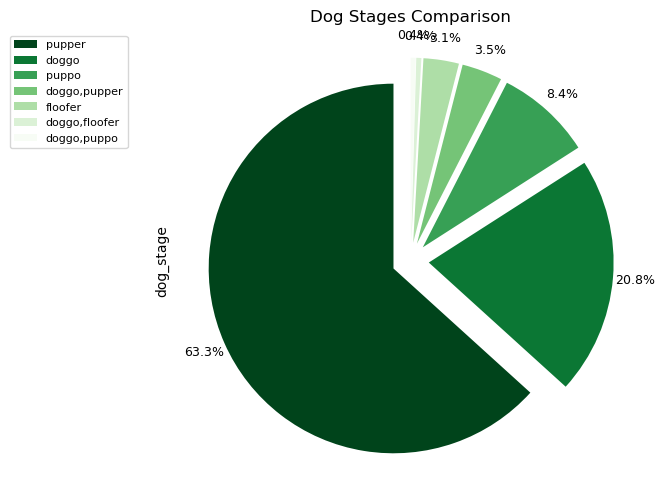

In [1389]:
# Create a pie chart showing which dog stage is most used.
kwargs = dict(
    startangle   = 90,
    colormap     = 'Greens_r',
    fontsize     = 9,
    explode      = (0.1,0.1,0.1,0.1,0.1,0.1,0.1),
    figsize      = (60,6),
    autopct      = '%1.1f%%',
    pctdistance  = 1.12,
    legend       = True,
    labeldistance = None,
    title        = 'Dog Stages Comparison'
)

axpie = twitter_archive_master['dog_stage'].value_counts().plot.pie(**kwargs)
axpie.legend(loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=8)
plt.show()

> This visualization shows that even if the combo dog_stage's were combined the pupper would still be the majority of the dog_stage types.

<AxesSubplot:xlabel='dog_stage'>

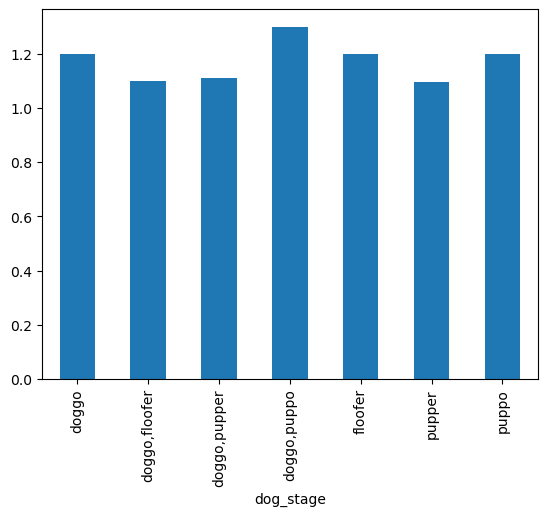

In [1360]:
twitter_archive_master.groupby('dog_stage')['calculated_rating'].mean().plot(kind='bar')

<AxesSubplot:xlabel='calculated_rating', ylabel='favorite_count'>

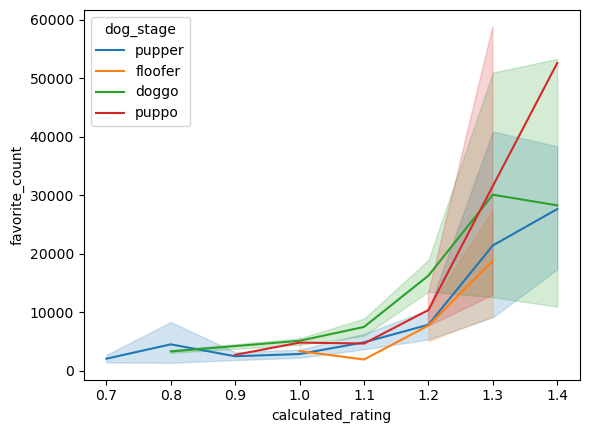

In [1361]:
# Since the less used combo's had lower ratings then the single dog_stage's making it difficult for comparison 
# this visualization looks at only the single dog_stages based on likes and rating.
import seaborn as sns

df = twitter_archive_master[['dog_stage','favorite_count','calculated_rating']].query('dog_stage.notnull()')
df = df[df.dog_stage.str.contains(",")==False]
sns.lineplot(data=df, x='calculated_rating', y='favorite_count', hue='dog_stage')